# Import Processed Data

In [43]:
import os
import importlib.util
import pandas as pd
import numpy as np
import sys

current_file_path = os.path.abspath(os.path.join("__file__" ,"../.."))
sys.path.append(os.path.abspath(os.path.join(thinkstats_path)))
import thinkstats2, thinkplot



import_data_path = os.path.join(current_file_path,'src','data')

spec = importlib.util.spec_from_file_location("import_clean_csv", os.path.join(import_data_path,"import_clean_data.py"))
import_data = importlib.util.module_from_spec(spec)
spec.loader.exec_module(import_data)

data = import_data.import_clean_csv()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

#import plotly.tools as tls
#import plotly.plotly as py #to go online

print(__version__) # requires version >= 1.9.0


2.2.3


In [21]:
def get_plotly(dfs, xdata, ydata, layout=True, xlimit=1, ylimit=1):
    data = [{'x': df[xdata], 'y':df[ydata], 'name': df.name, 'mode': 'markers', 'text': df.index} for df in dfs]

    if layout:
        layout_limits = go.Layout(
            xaxis=dict(
                range=[0, max([df.max()[xdata] for df in dfs])*xlimit]
            ),
            yaxis=dict(
                range=[0, max([df.max()[ydata] for df in dfs])*ylimit]
            )
        )
        fig = go.Figure(data=data, layout=layout_limits)
    else:
        fig = go.Figure(data=data)
    iplot(fig)

In [11]:
data.keys()

dict_keys(['tmdb_movie_spoken_languages', 'tmdb_movie_genres', 'tmdb_cast_credit', 'tmdb_movie_production_countries', 'tmdb_crew_credit', 'tmdb_movie_production_companies', 'tmdb_movie_keywords', 'tmdb_movie_main'])

In [12]:
movies = data['tmdb_movie_main'].set_index(['movie_id', 'title'])
cast = data['tmdb_cast_credit'].set_index(['movie_id', 'title'])
crew = data['tmdb_crew_credit'].set_index(['movie_id', 'title'])

# View info on dataframes


In [13]:
movies[['runtime', 'vote_average', 'vote_count', 'budget', 'revenue']].describe()

runtime  vote_average    vote_count        budget       revenue
count  4357.000000   4357.000000   4357.000000  4.357000e+03  4.357000e+03
mean    108.597200      6.202708    754.986918  3.369120e+07  9.451881e+07
std      20.442399      0.982422   1278.171389  4.084616e+07  1.674056e+08
min      41.000000      0.000000      0.000000  1.100000e+03  5.270000e+02
25%      95.000000      5.700000     77.000000  7.000000e+06  7.871522e+06
50%     105.000000      6.300000    288.000000  2.000000e+07  3.356114e+07
75%     119.000000      6.800000    833.000000  4.500000e+07  1.053163e+08
max     338.000000     10.000000  13752.000000  3.800000e+08  2.787965e+09

# Calculate 'net' and 'net_pct'
To quantify the success of a movie, we will calculate net revenue and net revenue (`net`) as a percentage of the budget (`net_pct`). The movies found in the top 5 for `budget`, `revenue`, `net`, and `net_pct` are not consistent. 

In [14]:
movies['net'] = movies.revenue - movies.budget
movies['net_pct'] = movies.revenue.divide(movies.budget) - 1
movies[['net','net_pct']].describe()

net      net_pct
count  4.357000e+03  4357.000000
mean   6.082761e+07     3.930984
std    1.407965e+08    20.343577
min   -1.657101e+08    -0.999875
25%   -2.267642e+06    -0.318098
50%    1.124116e+07     0.876884
75%    6.571488e+07     2.853306
max    2.550965e+09   438.616585

In [15]:
movies.nlargest(5,'budget')

budget  \
movie_id title                                                      
1865     Pirates of the Caribbean: On Stranger Tides  380000000.0   
285      Pirates of the Caribbean: At World's End     300000000.0   
99861    Avengers: Age of Ultron                      280000000.0   
1452     Superman Returns                             270000000.0   
49529    John Carter                                  260000000.0   

                                                     original_language  \
movie_id title                                                           
1865     Pirates of the Caribbean: On Stranger Tides                en   
285      Pirates of the Caribbean: At World's End                   en   
99861    Avengers: Age of Ultron                                    en   
1452     Superman Returns                                           en   
49529    John Carter                                                en   

                                                                                               overview  \
movie_id title                                                                                            
1865     Pirates of the Caribbean: On Stranger Tides  Captain Jack Sparrow crosses paths with a woma...   
285      Pirates of the Caribbean: At World's End     Captain Barbossa, long believed to be dead, ha...   
99861    Avengers: Age of Ultron                      When Tony Stark tries to jumpstart a dormant p...   
1452     Superman Returns                             Superman returns to discover his 5-year absenc...   
49529    John Carter                                  John Carter is a war-weary, former military ca...   

                                                      popularity release_date  \
movie_id title                                                                  
1865     Pirates of the Caribbean: On Stranger Tides  135.413856   2011-05-14   
285      Pirates of the Caribbean: At World's End     139.082615   2007-05-19   
99861    Avengers: Age of Ultron                      134.279229   2015-04-22   
1452     Superman Returns                              57.925623   2006-06-28   
49529    John Carter                                   43.926995   2012-03-07   

                                                           revenue  runtime  \
movie_id title                                                                
1865     Pirates of the Caribbean: On Stranger Tides  1.045714e+09    136.0   
285      Pirates of the Caribbean: At World's End     9.610000e+08    169.0   
99861    Avengers: Age of Ultron                      1.405404e+09    141.0   
1452     Superman Returns                             3.910812e+08    154.0   
49529    John Carter                                  2.841391e+08    132.0   

                                                        status  \
movie_id title                                                   
1865     Pirates of the Caribbean: On Stranger Tides  Released   
285      Pirates of the Caribbean: At World's End     Released   
99861    Avengers: Age of Ultron                      Released   
1452     Superman Returns                             Released   
49529    John Carter                                  Released   

                                                                                             tagline  \
movie_id title                                                                                         
1865     Pirates of the Caribbean: On Stranger Tides                     Live Forever Or Die Trying.   
285      Pirates of the Caribbean: At World's End     At the end of the world, the adventure begins.   
99861    Avengers: Age of Ultron                                                 A New Age Has Come.   
1452     Superman Returns                                                                        NaN   
49529    John Carter                                            Lost in our world, found in anoth

In [16]:
movies.nlargest(5,'revenue')

budget original_language  \
movie_id title                                           
19995    Avatar          237000000.0                en   
597      Titanic         200000000.0                en   
24428    The Avengers    220000000.0                en   
135397   Jurassic World  150000000.0                en   
168259   Furious 7       190000000.0                en   

                                                                  overview  \
movie_id title                                                               
19995    Avatar          In the 22nd century, a paraplegic Marine is di...   
597      Titanic         84 years later, a 101-year-old woman named Ros...   
24428    The Avengers    When an unexpected enemy emerges and threatens...   
135397   Jurassic World  Twenty-two years after the events of Jurassic ...   
168259   Furious 7       Deckard Shaw seeks revenge against Dominic Tor...   

                         popularity release_date       revenue  runtime  \
movie_id title                                                            
19995    Avatar          150.437577   2009-12-10  2.787965e+09    162.0   
597      Titanic         100.025899   1997-11-18  1.845034e+09    194.0   
24428    The Avengers    144.448633   2012-04-25  1.519558e+09    143.0   
135397   Jurassic World  418.708552   2015-06-09  1.513529e+09    124.0   
168259   Furious 7       102.322217   2015-04-01  1.506249e+09    137.0   

                           status                                    tagline  \
movie_id title                                                                 
19995    Avatar          Released                Enter the World of Pandora.   
597      Titanic         Released  Nothing on Earth could come between them.   
24428    The Avengers    Released                    Some assembly required.   
135397   Jurassic World  Released                          The park is open.   
168259   Furious 7       Released                        Vengeance Hits Home   

                         vote_average  vote_count           net    net_pct  
movie_id title                                                              
19995    Avatar                   7.2       11800  2.550965e+09  10.763566  
597      Titanic                  7.5        7562  1.645034e+09   8.225171  
24428    The Avengers             7.4       11776  1.299558e+09   5.907081  
135397   Jurassic World           6.5        8662  1.363529e+09   9.090192  
168259   Furious 7                7.3        4176  1.316249e+09   6.927628

In [17]:
movies.nlargest(5,'net')

budget original_language  \
movie_id title                                           
19995    Avatar          237000000.0                en   
597      Titanic         200000000.0                en   
135397   Jurassic World  150000000.0                en   
168259   Furious 7       190000000.0                en   
24428    The Avengers    220000000.0                en   

                                                                  overview  \
movie_id title                                                               
19995    Avatar          In the 22nd century, a paraplegic Marine is di...   
597      Titanic         84 years later, a 101-year-old woman named Ros...   
135397   Jurassic World  Twenty-two years after the events of Jurassic ...   
168259   Furious 7       Deckard Shaw seeks revenge against Dominic Tor...   
24428    The Avengers    When an unexpected enemy emerges and threatens...   

                         popularity release_date       revenue  runtime  \
movie_id title                                                            
19995    Avatar          150.437577   2009-12-10  2.787965e+09    162.0   
597      Titanic         100.025899   1997-11-18  1.845034e+09    194.0   
135397   Jurassic World  418.708552   2015-06-09  1.513529e+09    124.0   
168259   Furious 7       102.322217   2015-04-01  1.506249e+09    137.0   
24428    The Avengers    144.448633   2012-04-25  1.519558e+09    143.0   

                           status                                    tagline  \
movie_id title                                                                 
19995    Avatar          Released                Enter the World of Pandora.   
597      Titanic         Released  Nothing on Earth could come between them.   
135397   Jurassic World  Released                          The park is open.   
168259   Furious 7       Released                        Vengeance Hits Home   
24428    The Avengers    Released                    Some assembly required.   

                         vote_average  vote_count           net    net_pct  
movie_id title                                                              
19995    Avatar                   7.2       11800  2.550965e+09  10.763566  
597      Titanic                  7.5        7562  1.645034e+09   8.225171  
135397   Jurassic World           6.5        8662  1.363529e+09   9.090192  
168259   Furious 7                7.3        4176  1.316249e+09   6.927628  
24428    The Avengers             7.4       11776  1.299558e+09   5.907081

In [18]:
movies.nlargest(5,'net_pct')

budget original_language  \
movie_id title                                                 
9372     Super Size Me             65000.0                en   
23827    Paranormal Activity      450000.0                en   
299245   The Gallows              100000.0                en   
83       Open Water               130000.0                en   
2667     The Blair Witch Project  600000.0                en   

                                                                           overview  \
movie_id title                                                                        
9372     Super Size Me            Morgan Spurlock subjects himself to a diet bas...   
23827    Paranormal Activity      After a young, middle class couple moves into ...   
299245   The Gallows              20 years after a horrific accident during a sm...   
83       Open Water               Two divers are left out at sea without a boat....   
2667     The Blair Witch Project  In October of 1994 three student filmmakers di...   

                                  popularity release_date      revenue  \
movie_id title                                                           
9372     Super Size Me             10.400603   2004-01-17   28575078.0   
23827    Paranormal Activity       47.456823   2007-09-14  194183034.0   
299245   The Gallows               18.045782   2015-07-10   42664410.0   
83       Open Water                15.611857   2004-08-06   54667954.0   
2667     The Blair Witch Project   41.690578   1999-07-14  248300000.0   

                                  runtime    status  \
movie_id title                                        
9372     Super Size Me              100.0  Released   
23827    Paranormal Activity         86.0  Released   
299245   The Gallows                 87.0  Released   
83       Open Water                  79.0  Released   
2667     The Blair Witch Project     81.0  Released   

                                                                            tagline  \
movie_id title                                                                        
9372     Super Size Me            The first ever reality-based movie ... everyth...   
23827    Paranormal Activity                           What Happens When You Sleep?   
299245   The Gallows                                    Every School Has Its Spirit   
83       Open Water                                            Scream all you want.   
2667     The Blair Witch Project    The scariest movie of all time is a true story.   

                                  vote_average  vote_count          net  \
movie_id title                                                            
9372     Super Size Me                     6.6         506   28510078.0   
23827    Paranormal Activity               5.9        1316  193733034.0   
299245   The Gallows                       4.9         361   42564410.0   
83       Open Water                        5.4         315   54537954.0   
2667     The Blair Witch Project           6.3        1055  247700000.0   

                                     net_pct  
movie_id title                                
9372     Super Size Me            438.616585  
23827    Paranormal Activity      430.517853  
299245   The Gallows              425.644100  
83       Open Water               419.522723  
2667     The Blair Witch Project  412.833333

# Visualizing the Data
For movies to be considered `Hits`, the a movie must breaks even: `net >= 0`. All movies that did not break even are considered `Flops`.

In [19]:
key_metrics = ['budget', 'revenue','net', 'net_pct','runtime', 'vote_average', 'vote_count','popularity', 'release_date']
Total = movies[key_metrics]
Hits = Total[Total.net >= 0]
Flops = Total[Total.net < 0]

Total.name = "Total"
Hits.name = "Hits"
Flops.name = "Fops"

In [22]:
get_plotly([Hits, Flops], 'budget', 'net_pct')

In [24]:
get_plotly([Hits, Flops], 'release_date', 'net_pct', layout=False)

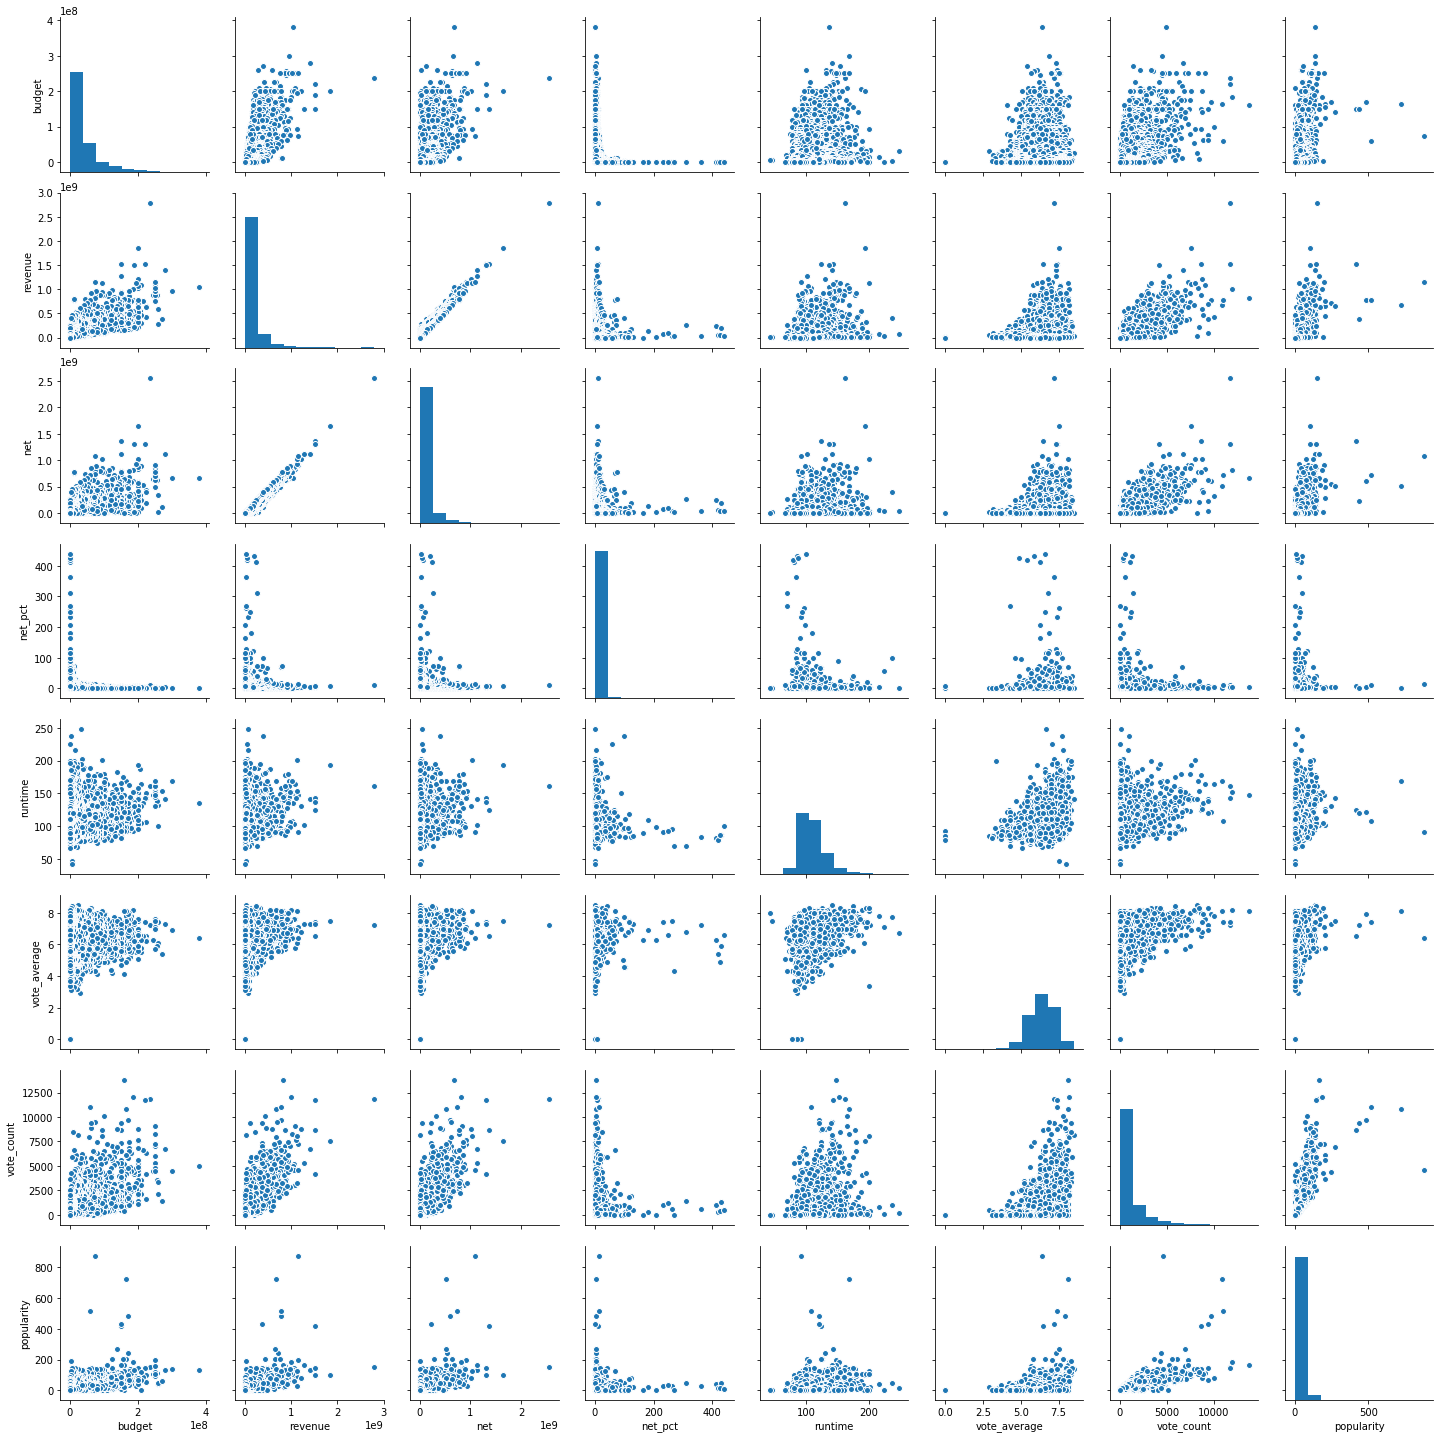

In [293]:
sns.pairplot(Hits)
plt.show()

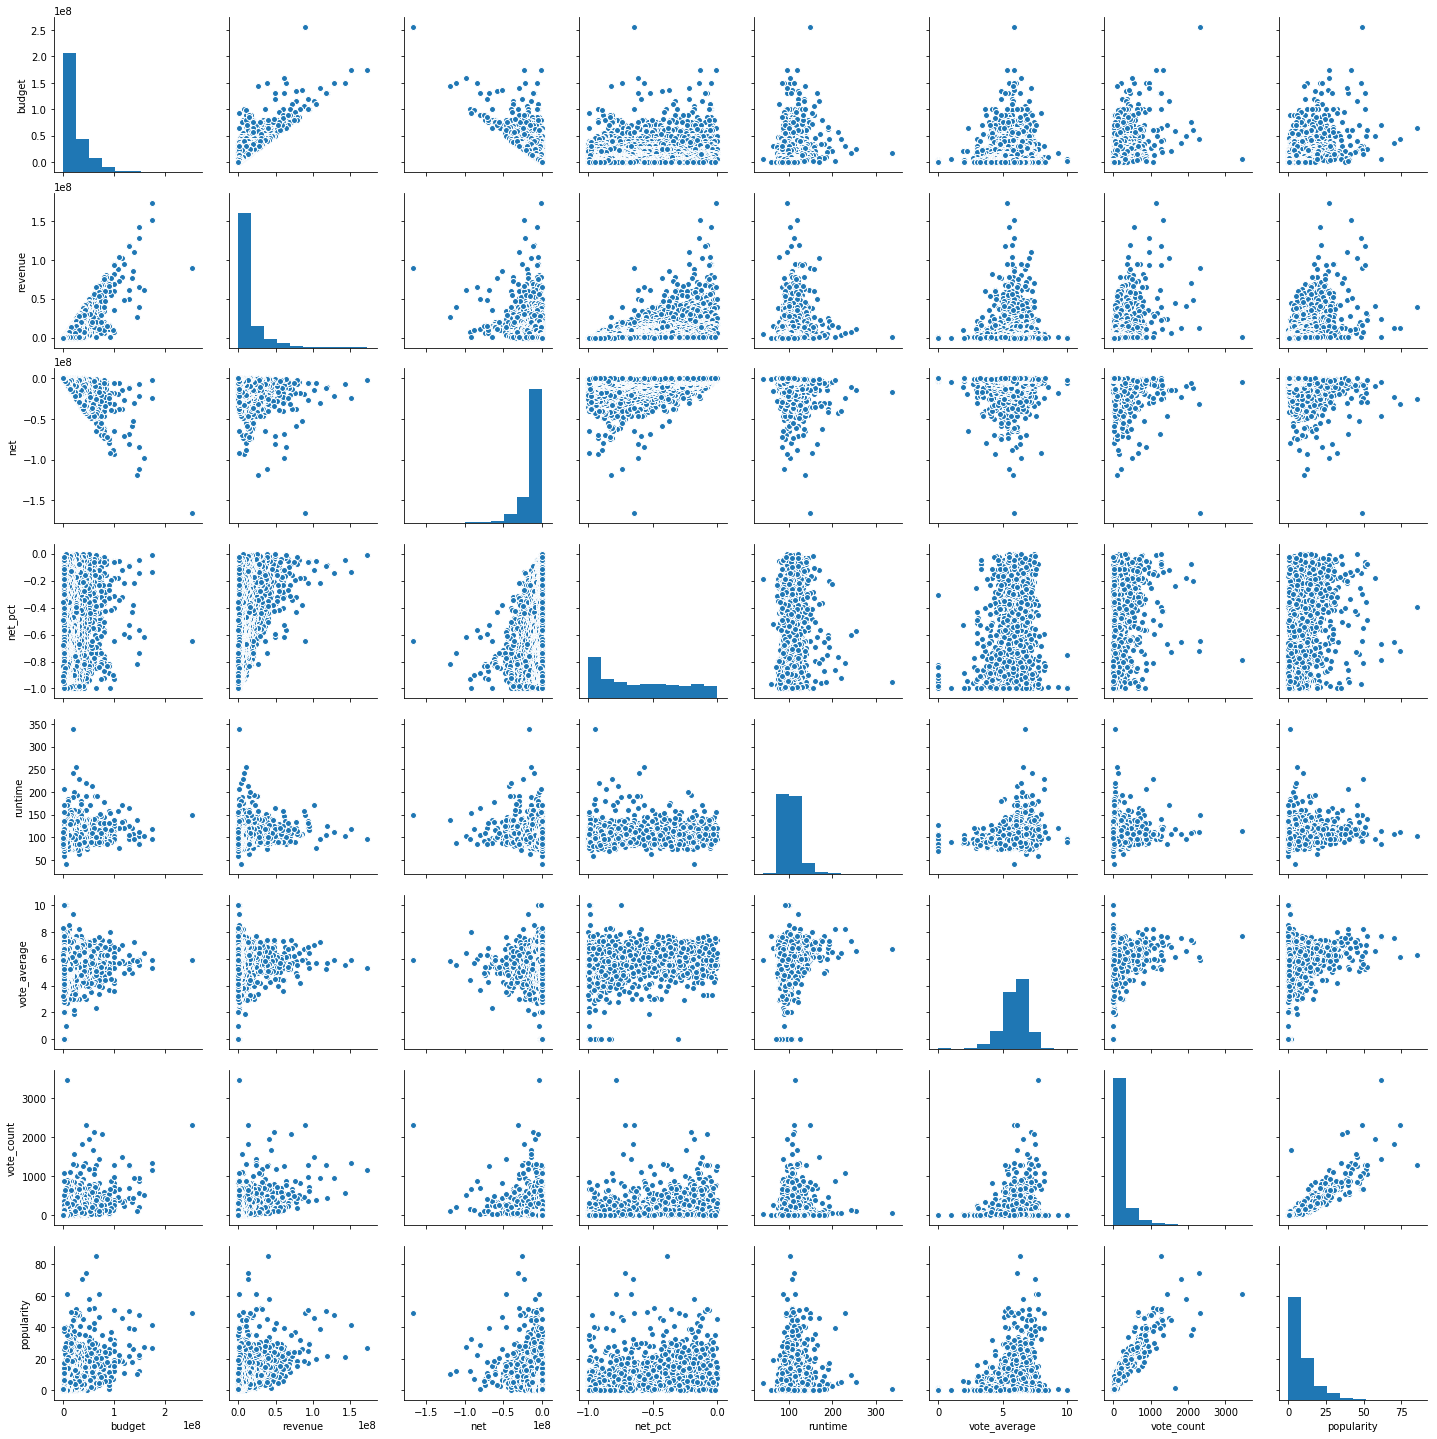

In [294]:
sns.pairplot(Flops)
plt.show()

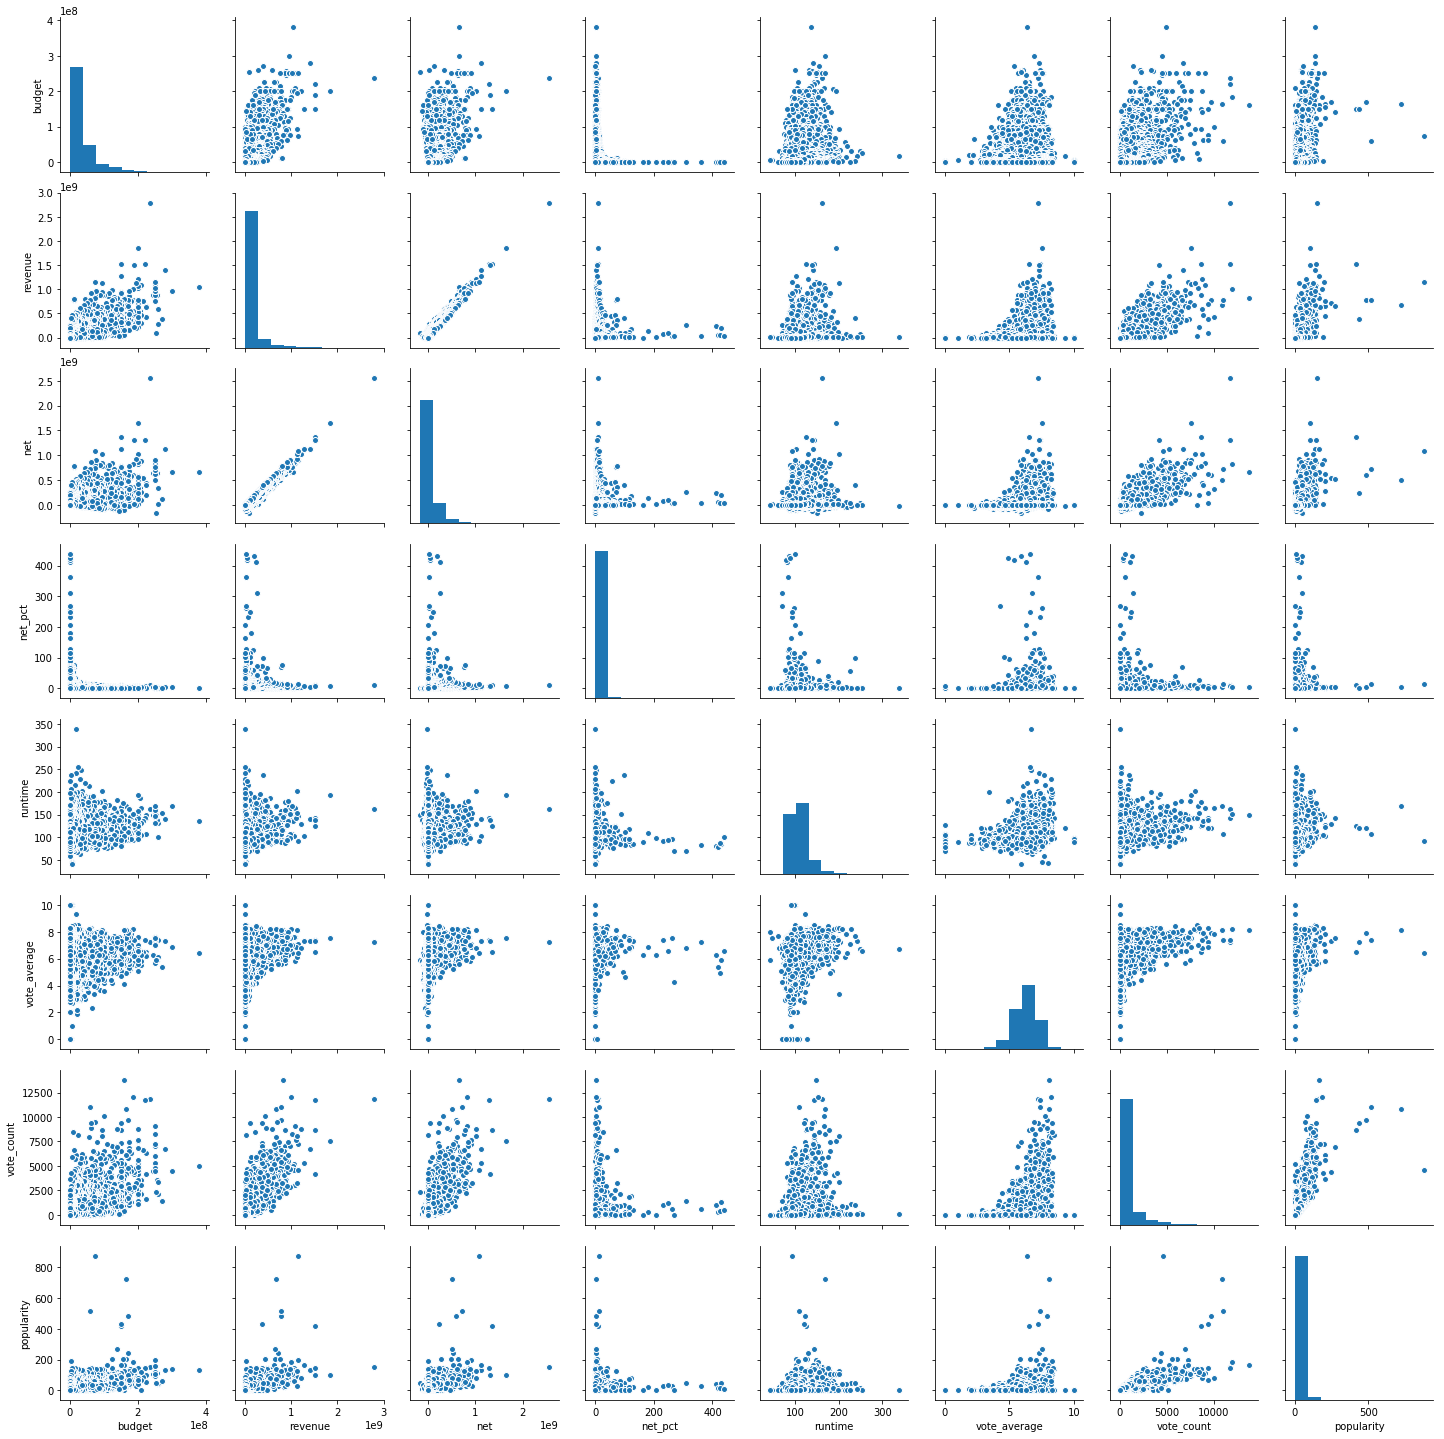

In [302]:
sns.pairplot(Total)
plt.show()

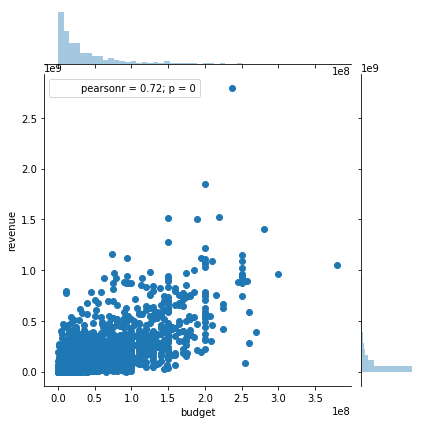

In [303]:
sns.jointplot(x="budget", y="revenue", data=Total)

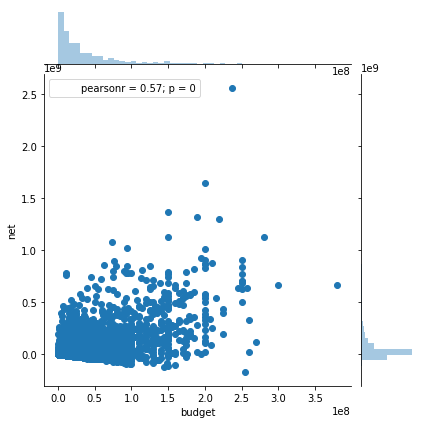

In [304]:
sns.jointplot(x="budget", y="net", data=Total)

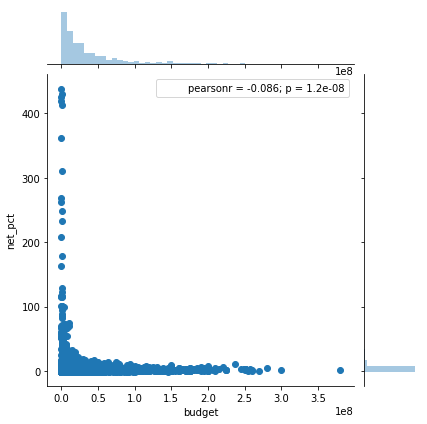

In [305]:
sns.jointplot(x="budget", y="net_pct", data=Total)

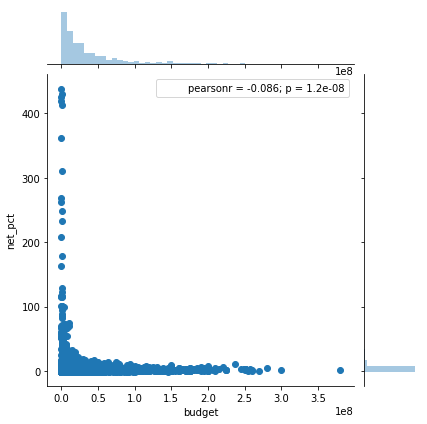

In [301]:
sns.jointplot(x="budget", y="net_pct", data=Total)

## Track Records for Directors

It is difficult for directors to have a consistent track record of financially successful movies. The more movies a director makes, the lower the `net_pct`. First time directors (i.e., `count = 1`) are responsible for the most financially successful movies, but they are just as likely to produce flops.

In [27]:
Hits_Director = Hits.merge(right=crew[crew.job == 'Director'], left_index=True, right_index=True)
Flops_Director = Flops.merge(right=crew[crew.job == 'Director'], left_index=True, right_index=True)
Hits_Director_Net_Pct = Hits_Director.groupby('name').net_pct.agg(['mean', 'count']).sort_values(by='mean', ascending=False)
Flops_Director_Net_Pct = Flops_Director.groupby('name').net_pct.agg(['mean', 'count']).sort_values(by='mean', ascending=False)

Hits_Director_Net_Pct.name = 'Hits_Director_Net_Pct'
Flops_Director_Net_Pct.name = 'Flops_Director_Net_Pct'

get_plotly([Hits_Director_Net_Pct, Flops_Director_Net_Pct], 'count', 'mean', layout=False)

In [30]:
Hits_Director_Net_Pct['count'].iplot(kind='histogram',histnorm='probability density')

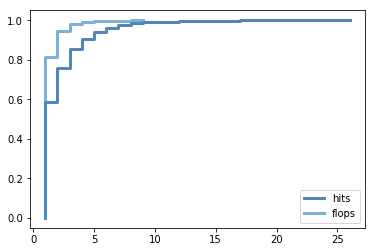

In [52]:
hits_cdf = thinkstats2.Cdf(Hits_Director_Net_Pct['count'], label='hits')
flops_cdf = thinkstats2.Cdf(Flops_Director_Net_Pct['count'], label='flops')
thinkplot.PrePlot(2)
thinkplot.Cdfs([hits_cdf, flops_cdf])
thinkplot.Show()